## Glossário <h2>

1. *Introdução* 
    * 1.1 Desafio
    * 1.2 Contexto
    * 1.3 Sobre os dados
    * 1.4 Importação das bibliotecas
    * 1.5 Escolha dos dados
2. *ETL*
    * 2.1 Importação dos dados
    * 2.2 Limpeza e transformação dos dados
3. *Análise* 
    * 3.1 Análise do Ticket Médio
    * 3.2 Análise dos top consumidores
    * 3.3 Análise dos produtos
    * 3.4 Análise de churn

---

### *1.4 Importação das bibliotecas* <h3>

#### Bibliotecas utilizadas <h4>
* pandas: Manipulação e limpeza dos dados
* matplotlib e seaborn: Visualizações gráficas
* numpy: Cálculos com os dados

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

### 2. *ETL* <h3>

#### 2.1 Importação dos dados <h4>

In [297]:
orders = pd.read_csv("data/northwind/orders.csv", sep=";")
order_details = pd.read_csv("data/northwind/order_details.csv", sep=";")
customers = pd.read_csv("data/northwind/customers.csv", sep=";")
products = pd.read_csv("data/northwind/products.csv", sep=";")
employees = pd.read_csv("data/northwind/employees.csv", sep=";")

---

#### 2.2 *Limpeza e tratamento dos dados* <h4>

Lendo o dataset "orders.csv"

In [298]:
print(f"O dataset orders tem {orders.shape[0]} linhas e {orders.shape[1]} colunas")

orders.head()

O dataset orders tem 830 linhas e 14 colunas


,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [299]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          830 non-null    int64  
 1   customer_id       830 non-null    object 
 2   employee_id       830 non-null    int64  
 3   order_date        830 non-null    object 
 4   required_date     830 non-null    object 
 5   shipped_date      809 non-null    object 
 6   ship_via          830 non-null    int64  
 7   freight           830 non-null    float64
 8   ship_name         830 non-null    object 
 9   ship_address      830 non-null    object 
 10  ship_city         830 non-null    object 
 11  ship_region       323 non-null    object 
 12  ship_postal_code  811 non-null    object 
 13  ship_country      830 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


As colunas 'ship_region', 'ship_postal_code' e 'ship_via' não fazem parte do foco da análise, por isso serão excluídas para deixar os datasets apenas com informações relevantes

In [300]:
orders.drop(columns=['ship_region', 'ship_postal_code', 'ship_via'], axis=1, inplace=True)

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       830 non-null    int64  
 1   customer_id    830 non-null    object 
 2   employee_id    830 non-null    int64  
 3   order_date     830 non-null    object 
 4   required_date  830 non-null    object 
 5   shipped_date   809 non-null    object 
 6   freight        830 non-null    float64
 7   ship_name      830 non-null    object 
 8   ship_address   830 non-null    object 
 9   ship_city      830 non-null    object 
 10  ship_country   830 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.5+ KB


Além disso, as colunas *'order_date'*, *'required_date'* e *'shipped_date'* estão em formato de 'object' o que é *incorreto para datas*. Por isso, utilizaremos a função *"to_datetime"* do pandas para corrigir este erro.

In [301]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['required_date'] = pd.to_datetime(orders['required_date'])
orders['shipped_date'] = pd.to_datetime(orders['shipped_date'])

Foram criadas as colunas *'order_year'* (com o ano do pedido) e *'year_month'* (com o mês e ano do pedido) para poder ser utilizada na análise seguinte.

In [302]:
orders['order_year'] = orders['order_date'].dt.year
orders['year_month'] = orders['order_date'].dt.to_period('M')

orders[['order_year', 'year_month']]

,order_year,year_month
0,1996,1996-07
1,1996,1996-07
2,1996,1996-07
3,1996,1996-07
4,1996,1996-07
...,...,...
825,1998,1998-05
826,1998,1998-05
827,1998,1998-05
828,1998,1998-05


In [303]:
orders.isna().sum()

order_id          0
customer_id       0
employee_id       0
order_date        0
required_date     0
shipped_date     21
freight           0
ship_name         0
ship_address      0
ship_city         0
ship_country      0
order_year        0
year_month        0
dtype: int64

Apesar de haver valores faltantes para a coluna de 'shipped_date' (data de entrega do pedido) optei por não excluir os registros, uma vez que essa coluna não será utilizada na análise.

Lendo o dataset "order_details.csv"

In [304]:
print(f'O dataset orders tem {order_details.shape[0]} linhas e {order_details.shape[1]} colunas')

order_details.head()

O dataset orders tem 2155 linhas e 5 colunas


,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [305]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null   int64  
 2   unit_price  2155 non-null   float64
 3   quantity    2155 non-null   int64  
 4   discount    2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


In [306]:
order_details.isna().sum()

order_id      0
product_id    0
unit_price    0
quantity      0
discount      0
dtype: int64

Lendo o dataset "customers.csv"

In [307]:
print(f"O dataset customers tem {customers.shape[0]} linhas e {customers.shape[1]} colunas")

customers.head()

O dataset customers tem 91 linhas e 11 colunas


,customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [308]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    91 non-null     object
 1   company_name   91 non-null     object
 2   contact_name   91 non-null     object
 3   contact_title  91 non-null     object
 4   address        91 non-null     object
 5   city           91 non-null     object
 6   region         31 non-null     object
 7   postal_code    90 non-null     object
 8   country        91 non-null     object
 9   phone          91 non-null     object
 10  fax            69 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


Removendo as colunas 'fax', 'phone', e 'region' do dataset pois não serão utilizadas para construir a tabela final. Além disso, possuem valores faltantes.

In [309]:
customers.drop(columns=['fax', 'phone', 'region'], inplace=True)

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    91 non-null     object
 1   company_name   91 non-null     object
 2   contact_name   91 non-null     object
 3   contact_title  91 non-null     object
 4   address        91 non-null     object
 5   city           91 non-null     object
 6   postal_code    90 non-null     object
 7   country        91 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB


In [310]:
customers['customer_id'].nunique()

91

Lendo o dataset "products.csv"

In [311]:
print(f'O dataset products tem {products.shape[0]} linhas e {products.shape[1]} colunas')

products.head()

O dataset products tem 77 linhas e 10 colunas


,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [312]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         77 non-null     int64  
 1   product_name       77 non-null     object 
 2   supplier_id        77 non-null     int64  
 3   category_id        77 non-null     int64  
 4   quantity_per_unit  77 non-null     object 
 5   unit_price         77 non-null     float64
 6   units_in_stock     77 non-null     int64  
 7   units_on_order     77 non-null     int64  
 8   reorder_level      77 non-null     int64  
 9   discontinued       77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [313]:
products['product_id'].nunique()

77

Lendo o dataset "employees"

In [314]:
print(f'O dataset employees tem {employees.shape[0]} linhas e {employees.shape[1]} colunas')

employees.head()

O dataset employees tem 9 linhas e 18 colunas


,employee_id,last_name,first_name,title,title_of_courtesy,birth_date,hire_date,address,city,region,postal_code,country,home_phone,extension,photo,notes,reports_to,photo_path
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,\x,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,\x,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,\x,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,\x,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [315]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        9 non-null      int64  
 1   last_name          9 non-null      object 
 2   first_name         9 non-null      object 
 3   title              9 non-null      object 
 4   title_of_courtesy  9 non-null      object 
 5   birth_date         9 non-null      object 
 6   hire_date          9 non-null      object 
 7   address            9 non-null      object 
 8   city               9 non-null      object 
 9   region             5 non-null      object 
 10  postal_code        9 non-null      object 
 11  country            9 non-null      object 
 12  home_phone         9 non-null      object 
 13  extension          9 non-null      int64  
 14  photo              9 non-null      object 
 15  notes              9 non-null      object 
 16  reports_to         8 non-null 

In [316]:
employees['employee_id'].nunique()

9

Fazendo a junção das tabelas para criar o dataframe final que será utilizado durante toda a análise.

In [317]:
df_1 = pd.merge(order_details, orders, on='order_id', how='inner')
df_1 = pd.merge(df_1, products, on='product_id', how='inner')
df_1 = pd.merge(df_1, customers, on='customer_id', how='inner')



print(f'linhas: {df_1.shape[0]} colunas: {df_1.shape[1]}')
df_1.columns

linhas: 2155 colunas: 33


Index(['order_id', 'product_id', 'unit_price_x', 'quantity', 'discount',
       'customer_id', 'employee_id', 'order_date', 'required_date',
       'shipped_date', 'freight', 'ship_name', 'ship_address', 'ship_city',
       'ship_country', 'order_year', 'year_month', 'product_name',
       'supplier_id', 'category_id', 'quantity_per_unit', 'unit_price_y',
       'units_in_stock', 'units_on_order', 'reorder_level', 'discontinued',
       'company_name', 'contact_name', 'contact_title', 'address', 'city',
       'postal_code', 'country'],
      dtype='object')

In [318]:
diff_prices = df_1['unit_price_x'] - df_1['unit_price_y'] 

diff_prices.value_counts()

 0.00     1493
-3.60       41
-2.50       30
-1.55       26
-2.00       23
          ... 
-0.60        2
-2.55        2
-8.00        2
-7.00        1
-19.40       1
Name: count, Length: 63, dtype: int64

Renomeei a coluna 'unit_price_x' para 'unit_price_moment' e a coluna 'unit_price_y' para 'unit_price_historic' já que as colunas possuem diferença nos valores que podem ser fruto de impostos, descontos ou erros e inconsistências nos dados. 

Além disso criei a coluna 'total_item' que representará o total do registro do pedido (quantidade * preço unitário), já que será utilizada na análise

In [319]:
northwind = (df_1.rename(columns={'unit_price_x':'unit_price_moment', 'unit_price_y': 'unit_price_historic'}))

northwind['total_item'] = northwind['unit_price_moment'] * northwind['quantity'] - (northwind['discount'] * 100)
 
northwind.head()

,order_id,product_id,unit_price_moment,quantity,discount,customer_id,employee_id,order_date,required_date,shipped_date,...,reorder_level,discontinued,company_name,contact_name,contact_title,address,city,postal_code,country,total_item
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,30,0,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France,168.0
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,0,1,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France,98.0
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,0,0,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France,174.0
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,...,0,0,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,44087,Germany,167.4
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,...,10,0,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,44087,Germany,1696.0


In [320]:
northwind.columns

Index(['order_id', 'product_id', 'unit_price_moment', 'quantity', 'discount',
       'customer_id', 'employee_id', 'order_date', 'required_date',
       'shipped_date', 'freight', 'ship_name', 'ship_address', 'ship_city',
       'ship_country', 'order_year', 'year_month', 'product_name',
       'supplier_id', 'category_id', 'quantity_per_unit',
       'unit_price_historic', 'units_in_stock', 'units_on_order',
       'reorder_level', 'discontinued', 'company_name', 'contact_name',
       'contact_title', 'address', 'city', 'postal_code', 'country',
       'total_item'],
      dtype='object')

---

### 3. *Análise* <h3>

#### *3.1 Análise do ticket médio e da receita* <h4>

Primeiro, irei verificar como está a distruibuição dos valores dos totais dos pedidos

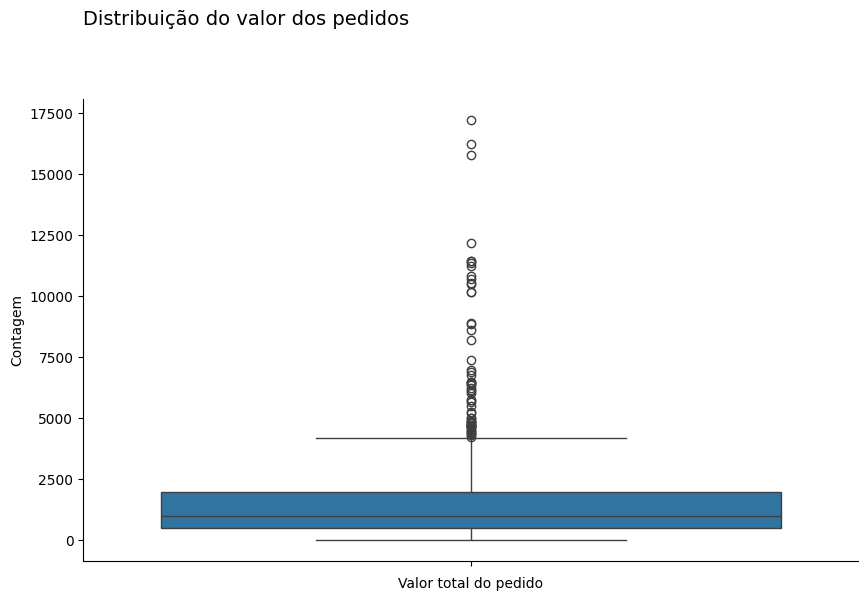

In [321]:
total_revenue = northwind.groupby('order_id')['total_item'].sum()

median_value = total_revenue.median()

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(total_revenue)

ax.set_title('Distribuição do valor dos pedidos\n\n\n', loc='left', fontsize=14)
ax.set_xlabel('Valor total do pedido')
ax.set_ylabel('Contagem')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


Observamos a presença de diversos outliers, por isso examinarei um pouco mais a fundo qual a propoção desses pedidos e por quem foram feitos

In [322]:
total_table = (
    northwind.groupby('order_id')
    .agg({'customer_id': 'first','total_item': 'sum'})
    .reset_index()
    .rename(columns={'total_item': 'total_order'})
)

total_table['total_order'].describe()

count      830.000000
mean      1617.294687
std       1985.499060
min         12.500000
25%        477.250000
50%        991.000000
75%       1979.550000
max      17240.000000
Name: total_order, dtype: float64

Nota-se que a média é cerca de 62% menor do que a mediana, o que acontece devido a presença de outliers

Aqui vemos que o desvio padrão é realmente muito alto, por isso para avaliar a presença de *outliers* utilizarei o método de Tukey. O método consiste em filtrar os dados que sejam maiores do que a soma do Q3 (terceiro quartil dos dados) + 1.5 * IQR (Q3 - Q1) e os dados que sejam menores do que a diferença entre o Q1 (primeiro quartil dos dados) - 1.5 * IQR. Portanto, criei uma coluna chamada 'is_outlier' que receberá "True" ou "False" para caso seja ou não outlier respectivamente.

In [323]:
q1 = total_table['total_order'].quantile(0.25)
q3 = total_table['total_order'].quantile(0.75)
IQR = q3 - q1

total_table['is_outlier'] = (
    (total_table['total_order'] > q3 + IQR * 1.5) | 
    (total_table['total_order'] < q1 - IQR * 1.5)
)

total_table['total_order'] = round(total_table['total_order'], 2)

pivot_outliers = pd.pivot_table(
    data=total_table,
    index='is_outlier',
    values='total_order',
    aggfunc=['count', 'mean']
).reset_index()


pivot_outliers['proportion'] = ((pivot_outliers['count'] / pivot_outliers['count'].sum()) * 100).round(2)

pivot_outliers

,is_outlier,count,mean,proportion
,,total_order,total_order,
0,False,771,1190.397821,92.89
1,True,59,7195.896102,7.11


Com isso, percebemos que cerca de 7.11% dos pedidos representam outliers, totalizando cerca de 59 pedidos. 

Assim, podemos plotar o gráfico novamente para entender como está a distribuição, sem estes pedidos.

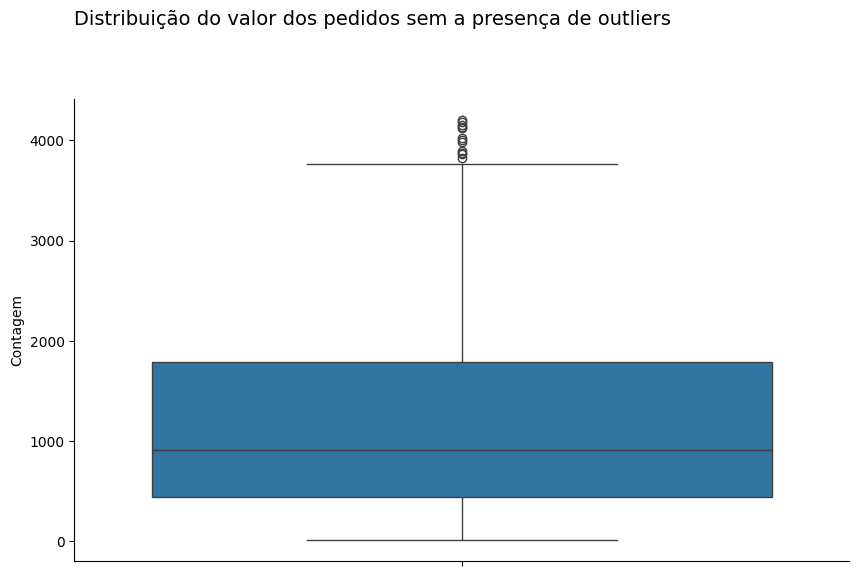

count     771.000000
mean     1190.397821
std       951.181513
min        12.500000
25%       442.500000
50%       914.400000
75%      1787.500000
max      4200.500000
Name: total_order, dtype: float64


In [324]:
non_outliers = total_table[total_table['is_outlier'] == False]

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(non_outliers['total_order'])

ax.set_title('Distribuição do valor dos pedidos sem a presença de outliers\n\n\n', loc='left', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Contagem')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

print(non_outliers['total_order'].describe())

#### Com isso temos um **Ticket Médio** de cerca de **$ 1190.40** <h4>

Outro ponto importante da análise é a receita total, para isso, decidi plotar em forma de gráfico a receita total mensal. Além disso, vou observar como o ticket médio se comporta de forma mensal. 

Para definir a receita mensal agrupei os dados em 'year-month' e depois somei o total da receita do mês. Já para definir o ticket médio, utilizei a receita mensal dividida pelo número de pedidos de cada mês e depois tirando a sua média.

In [325]:
monthly_revenue = northwind.groupby('year_month')['total_item'].sum()

monthly_orders = northwind.groupby('year_month')['order_id'].nunique()

monthly_mean_ticket = monthly_revenue / monthly_orders

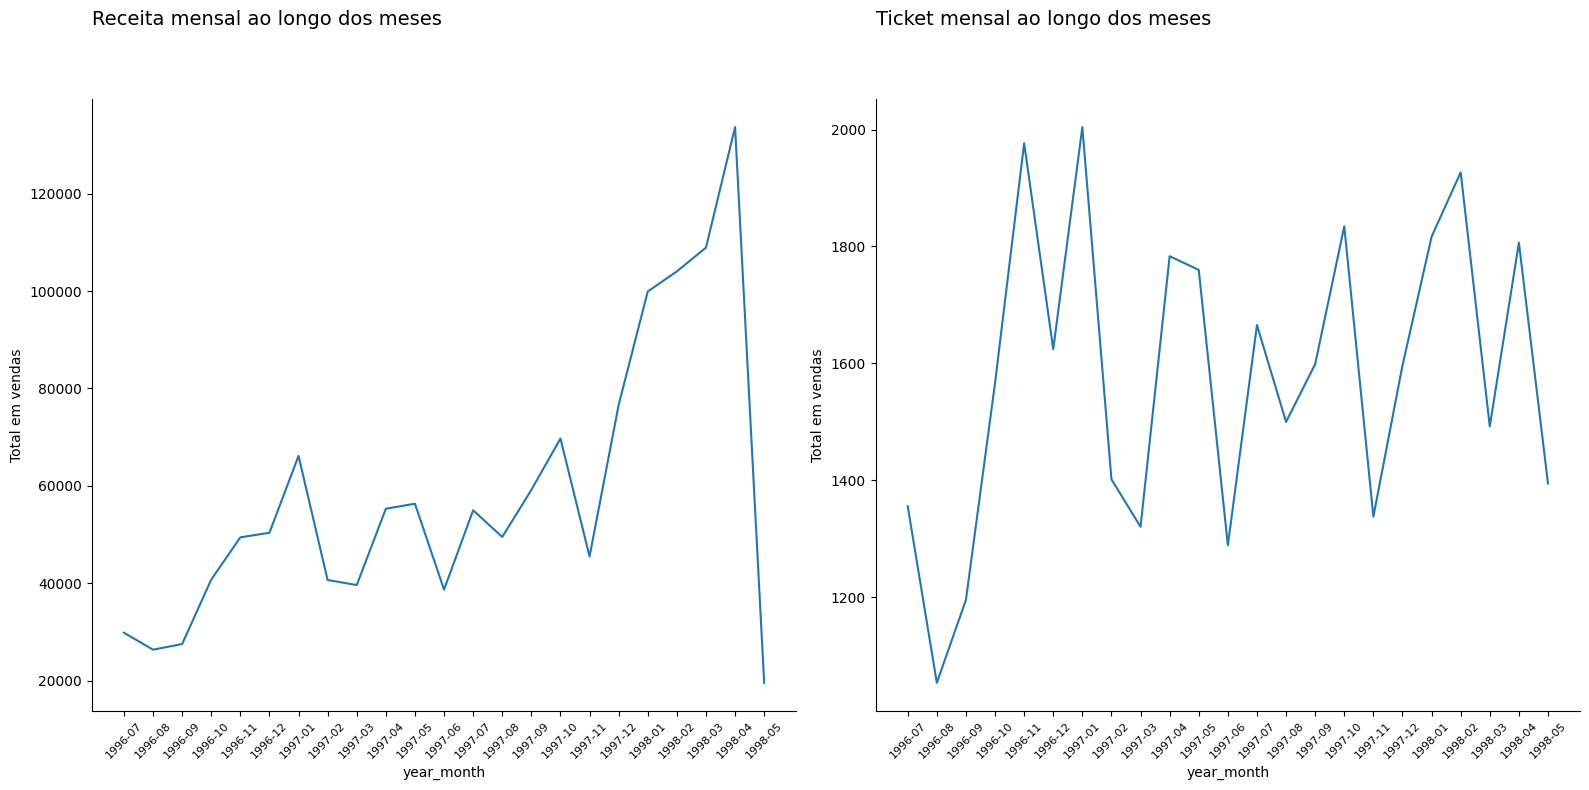

In [326]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

ax_1 = sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, ax=axs[0])
ax_1.set_title("Receita mensal ao longo dos meses\n\n\n", loc='left', fontsize=14)
ax_1.set_ylabel("Total em vendas")
ax_1.tick_params(axis='x', rotation=45, labelsize=8)

ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)

ax_2 = sns.lineplot(x=monthly_mean_ticket.index.astype(str), y=monthly_mean_ticket.values, ax=axs[1])
ax_2.set_title("Ticket mensal ao longo dos meses\n\n\n", loc='left', fontsize=14)
ax_2.set_ylabel("Total em vendas")
ax_2.tick_params(axis='x', rotation=45, labelsize=8)

ax_2.spines['top'].set_visible(False)
ax_2.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

Pelo gráfico do ticket médio mensal conseguimos observar que o valor oscila em uma sazonalidade de 3-5 meses, denotando períodos em que possuímos baixas na venda. Uma estratégia importante a ser seguida é identificar estes picos de sazonalidade e investir em campanhas de marketing e promoções.



Analisando o gráfico da receita mensal, percebemos uma grande inclinação a partir de novembro de 1997, o que nos mostra que as vendas em geral cresceram. Além disso, podemos observar que os períodos em que a receita cai são condizentes com os períodos em que o ticket médio mensal também decai. Denotando mais uma vez a existência de picos de sazonalidade

Outro ponto importante a ser analisado é de que no gráfico observamos uma queda drástica para o mês de Maio de 1998. Portanto, ao analisar a média do limite dos dias em que os pedidos são feitos, isto é, qual dia, em média, são feitos os últimos pedidos mês, percebemos que na verdade se trata de um mês com dados não completos (possivelmente não havia acabado o mês de maio quando o dataset foi construído).

In [327]:
max_days_orders = northwind.groupby('year_month')['order_date'].max().reset_index()

max_days_orders = max_days_orders['order_date'].dt.day

df_1998_05 = northwind[northwind['year_month'] == '1998-05']

max_stamp_1998_05 = pd.to_datetime(df_1998_05['order_date'].max())

max_day_1998_05 = max_stamp_1998_05.day

count = df_1998_05.groupby('order_id')['order_id'].count().sum()

mean_orders_by_month = northwind.groupby("year_month")["order_id"].count().mean()

print(f'Em média temos {int(mean_orders_by_month)} pedidos por mês e eles são feitos até o dia {int(max_days_orders.mean())}')
print(f'Entretanto, o mês 05 de 1998 possui {count} pedidos e só temos informações até o dia {max_day_1998_05}')


Em média temos 93 pedidos por mês e eles são feitos até o dia 28
Entretanto, o mês 05 de 1998 possui 59 pedidos e só temos informações até o dia 6


---

#### *3.2 Análise dos clientes* <h4>

Agora, analisando quem são os clientes responsáveis por fazer pedidos tão acima do normal, pois são clientes excepcionais e recomenda-se desenvolver estratégias de oferta e promoções para estes clientes.

In [328]:
outlier_clients = (
    total_table.groupby('customer_id')
    .agg({'order_id': 'count', 'total_order': 'mean'})
    .reset_index()
    .rename(columns={'total_order': 'avg_order'}))

top_10_clients = outlier_clients.sort_values('avg_order',ascending=False).head(10)

mean_orders_clients = total_table.groupby('customer_id')['order_id'].count().mean()

print(f'Média de compras por cliente: {mean_orders_clients:.0f}')

top_10_clients

Média de compras por cliente: 9


,customer_id,order_id,avg_order
60,QUICK,28,4174.585357
19,ERNSH,30,3751.389333
68,SAVEA,31,3700.431935
35,HUNGO,19,2983.810000
62,RATTC,18,2888.716667
56,PICCO,10,2609.495000
70,SIMOB,7,2561.207143
49,MEREP,13,2462.992308
32,HANAR,14,2420.439286
21,FOLIG,5,2333.380000


Observamos ainda que estes clientes possuem uma frequência de compra acima do normal, já que em média os clientes realizam 9 pedidos mensalmente

Verificando se existem clientes na base "customers" sem pedidos

In [329]:
clientes_totais = set(customers['customer_id'].unique())

clientes_com_pedidos = set(northwind['customer_id'].unique())

clientes_sem_pedido = clientes_totais - clientes_com_pedidos

print(f"Clientes sem pedido: {clientes_sem_pedido}")


Clientes sem pedido: {'PARIS', 'FISSA'}


In [332]:
clients_by_revenue = (
    northwind
    .groupby('customer_id')['total_item']
    .sum()
    .reset_index()
    .rename(columns={'total_item': 'total_revenue'})
)

top_10_clients_by_revenue = (
    clients_by_revenue
    .sort_values('total_revenue', ascending=False)
    .head(10)
)

top_10_clients_by_revenue

,customer_id,total_revenue
60,QUICK,116888.39
68,SAVEA,114713.39
19,ERNSH,112541.68
35,HUNGO,56692.39
62,RATTC,51996.90
32,HANAR,33886.15
22,FOLKO,32170.55
49,MEREP,32018.90
37,KOENE,31590.75
59,QUEEN,29866.10


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

# Invertendo a paleta de cores para valores mais altos ficarem mais escuros e mais baixos ficarem mais claros
cores = sns.color_palette("Blues_d", n_colors=10)[::-2]

values = top_10_clients_by_revenue['total_revenue']
index=top_10_clients_by_revenue['customer_id']

ax = sns.barplot(x=values, y=index, palette=cores)

for i, (valor, nome) in enumerate(zip(values, index)):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Top 5 produtos por receita", loc='left', fontsize=14)
ax.set_ylabel("")

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()



In [ ]:
top_products = northwind.groupby('product_name')['total_item'].sum()

top_5_products = top_products.sort_values(ascending=False).head(5).round(2)

top_5_products

product_name
Côte de Blaye              149874.2
Thüringer Rostbratwurst     87531.4
Raclette Courdavault        76041.0
Camembert Pierrot           49960.0
Tarte au sucre              49567.9
Name: total_item, dtype: float64

C:\Users\raul.araujo\AppData\Local\Temp\ipykernel_18348\52181643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_products.values, y=top_5_products.index, palette=cores)


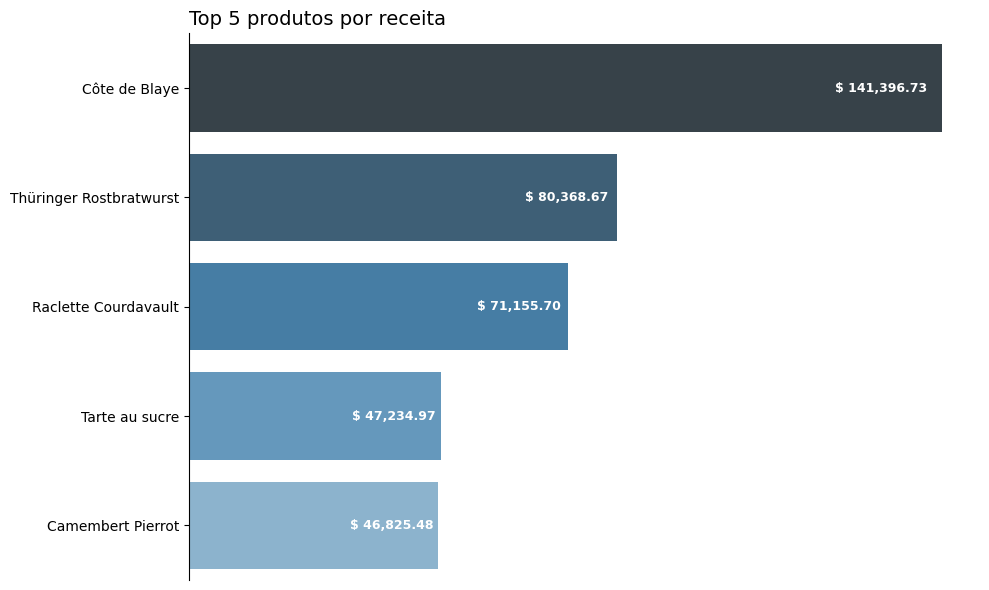

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

# Invertendo a paleta de cores para valores mais altos ficarem mais escuros e mais baixos ficarem mais claros
cores = sns.color_palette("Blues_d", n_colors=10)[::-2]

ax = sns.barplot(x=top_5_products.values, y=top_5_products.index, palette=cores)

for i, (valor, nome) in enumerate(zip(top_5_products.values, top_5_products.index)):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Top 5 produtos por receita", loc='left', fontsize=14)
ax.set_ylabel("")

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()



In [ ]:
top_categories = northwind.groupby('category_id')['total_item'].sum()

top_5_categories = top_categories.sort_values(ascending=False).head(5).round(2)

top_5_categories

category_id
1    267868.18
4    234507.28
3    167357.22
6    163022.36
8    131261.74
Name: total_item, dtype: float64

C:\Users\raul.araujo\AppData\Local\Temp\ipykernel_18348\2227011839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_categories.values, y=top_5_categories.index.astype(str), palette=cores)


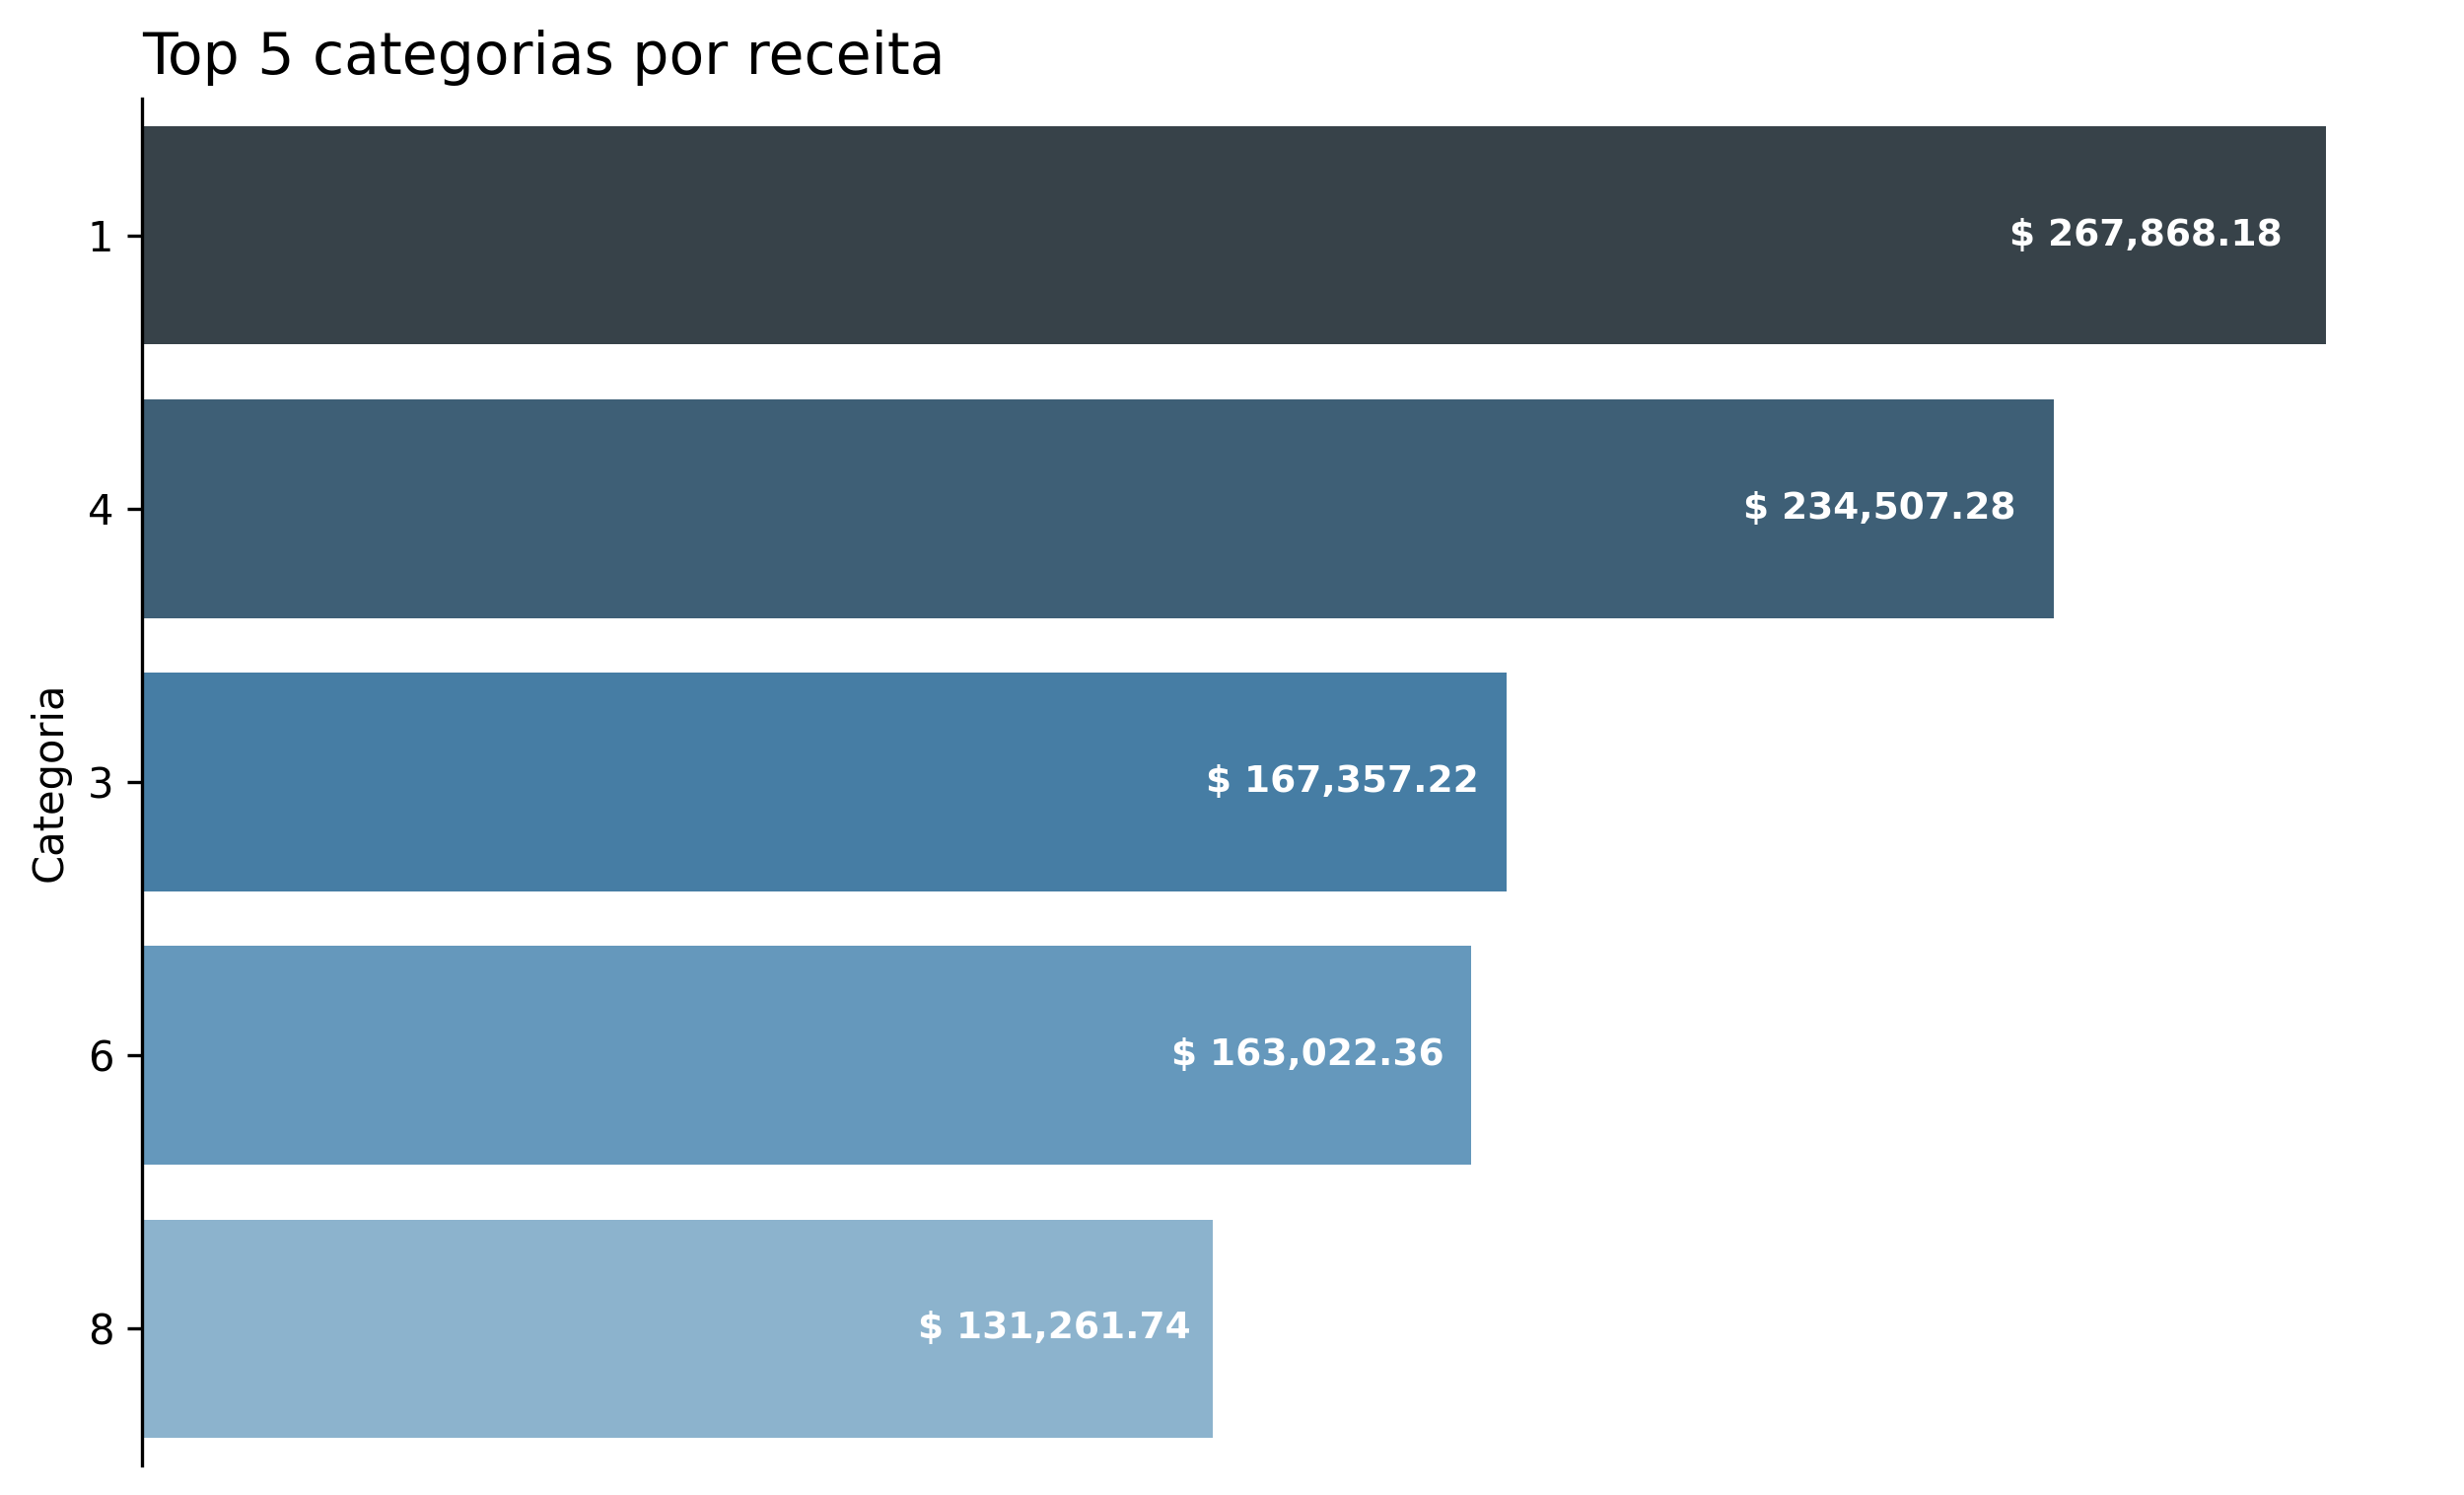

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

ax = sns.barplot(x=top_5_categories.values, y=top_5_categories.index.astype(str), palette=cores)

# Invertendo a paleta de cores para valores mais altos ficarem mais escuros e mais baixos ficarem mais claros
cores = sns.color_palette("Blues_d", n_colors=10)[::-2]

ax.set_title("Top 5 categorias por receita", loc='left', fontsize=14)
ax.set_ylabel("Categoria")

for i, (valor, nome) in enumerate(zip(top_5_categories.values, top_5_categories.index)):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_visible(False)

plt.show()

Analisando a relacao entre quantidade e desconto

In [ ]:
quantity_by_order_id = northwind.groupby("order_id")["quantity"].sum()

quantity_by_order_id

discount_by_order_id = northwind.groupby("order_id")["discount"].mean()

discount_by_order_id

df_quantity_per_discount = pd.DataFrame({'quantity': quantity_by_order_id.values, 'mean_discount': discount_by_order_id})

df_quantity_per_discount

,quantity,mean_discount
order_id,,
10248,27,0.000000
10249,49,0.000000
10250,60,0.100000
10251,41,0.033333
10252,105,0.033333
...,...,...
11073,30,0.000000
11074,14,0.050000
11075,42,0.150000


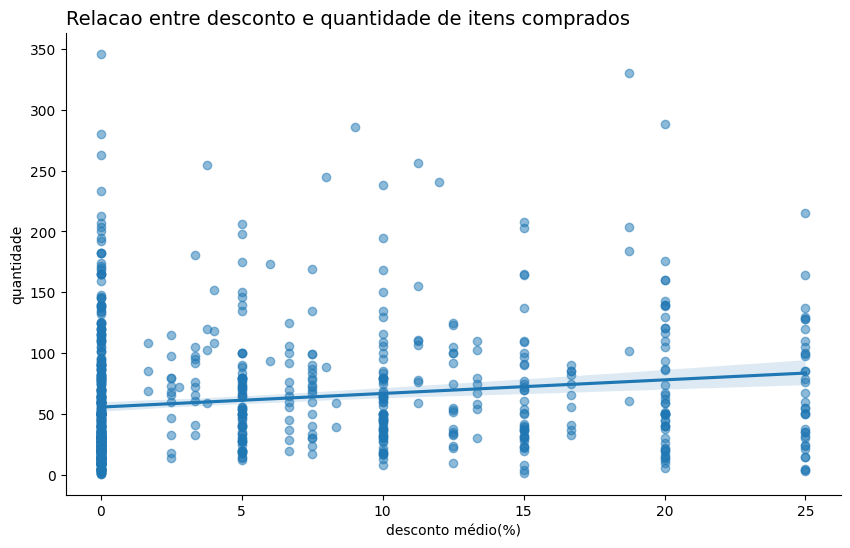

A correlacao entre desconto e quantidade de itens é: 0.16


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=df_quantity_per_discount['mean_discount'] * 100,  
    y=df_quantity_per_discount['quantity'],
    scatter_kws={'alpha': 0.5}
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Relacao entre desconto e quantidade de itens comprados', loc='left', fontsize=14)
ax.set_ylabel('quantidade')
ax.set_xlabel('desconto médio(%)')

plt.show()

corr = (np.corrcoef(df_quantity_per_discount['quantity'], df_quantity_per_discount['mean_discount'])[0][1]).round(2)

print(f'A correlacao entre desconto e quantidade de itens é: {corr}')